GSI map

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 

C_LIGHT = 2.99792458e8
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

# Ion properties:
m_u = 931.49410242e6 # eV/c^2 -- atomic mass unit
A = 12.011 # Weight of C
Z = 6  # Number of protons in the ion (C)
Ne = 3 # Number of remaining electrons (Lithium-like)
m_e = 0.511e6 # eV/c^2 -- electron mass
m_p = 938.272088e6 # eV/c^2 -- proton mass
c = 299792458.0 # m/s

q0=Z-Ne

mass0 = A*m_u + Ne*m_e # eV/c^2

beta_rel = 0.47
gamma_rel = 1.13

p0c = mass0*beta_rel*gamma_rel #eV/c

# p0c = equiv_proton_momentum*(Z-Ne) # eV/c
gamma0 = np.sqrt( 1 + (p0c/mass0)**2 ) # ion relativistic factor
beta0 = np.sqrt(1-1/(gamma0*gamma0)) # ion beta

####################################################################################################################

hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 154.82 *1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0


laser_wavelength=257.34*1e-9 # m

ion_excitation_energy=hw0
ion_excited_lifetime=3.8e-9
gamma_decay=1/ion_excited_lifetime

2.3827123827123828e-05


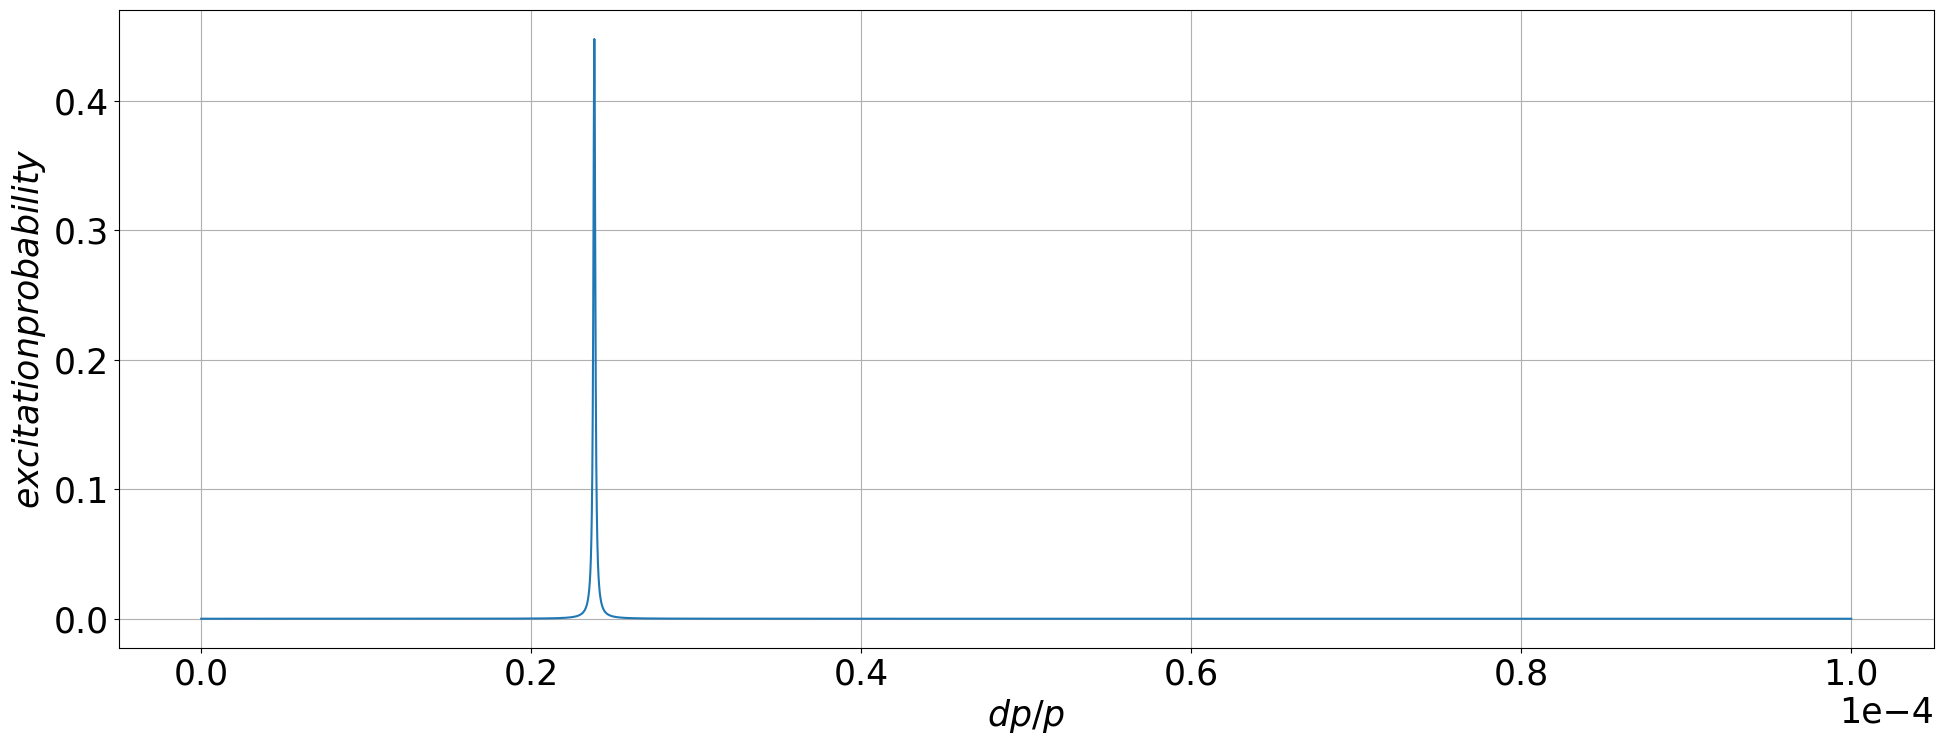

In [101]:
delta_range=np.linspace(4.5e-05,4.8e-5,int(1e6))
delta_range=np.linspace(0,1e-4,int(1e6))

K1 = 8.6

pc = p0c*(1.0+delta_range)#; // eV
gamma = np.sqrt(1.0 + pc*pc/(mass0*mass0))
beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)

ratio_ΔΓ_range = DeltaDetuning/gamma_decay

# Calculate the heatmap values using the equation
excitation_prob = 0.5*K1 / ((4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1))

max_prob = np.max(excitation_prob)
max_prob_index = np.argmax(excitation_prob)

# Find the corresponding delta value
corresponding_max_delta = delta_range[max_prob_index]

print(corresponding_max_delta)

# Create the heatmap
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(delta_range,excitation_prob)
# plt.title(f'width=2*{axis}')
plt.xlabel(r"$dp/p$")
plt.ylabel(r"$excitation probability$")
plt.grid(True)
plt.tight_layout()
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()


loop over all wavelengths

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from tqdm import tqdm 


hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 154.82 *1e-9 # m -- ion excitation wavelength
hw0 = 2*np.pi*hc/lambda_0 # m -- ion excitation wavelength
cos_theta=1
theta_l=0

ion_excitation_energy=hw0

axis=1e-1
mid=0

laser_range=np.linspace(2.57557259253e-07,257.8*1e-9,int(1e2))
laser_range=np.linspace(257.525*1e-9,257.528*1e-9,int(1e1))
delta_range=np.linspace(mid-axis,mid+axis,int(1e7))
K1 = 8.6

corresponding_max_delta_list=[]

for laser_wavelength in tqdm(laser_range):

    pc = p0c*(1.0+delta_range)#; // eV
    gamma = np.sqrt(1.0 + pc*pc/(mass0*mass0))
    beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

    laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

    OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
    DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)


    ratio_ΔΓ_range = DeltaDetuning/gamma_decay


    # Calculate the heatmap values using the equation
    excitation_prob = 0.5*K1 / (4*ratio_ΔΓ_range*ratio_ΔΓ_range + K1 + 1)

    max_prob = np.max(excitation_prob)
    max_prob_index = np.argmax(excitation_prob)

    # Find the corresponding delta value
    corresponding_max_delta = delta_range[max_prob_index]

    corresponding_max_delta_list.append(corresponding_max_delta)

#np.savez('results.npz', corresponding_max_delta_list=corresponding_max_delta_list,laser_range=laser_range,delta_range=delta_range)

loaded_data = np.load('results.npz')

# Access the individual arrays or variables
corresponding_max_delta_list = loaded_data['corresponding_max_delta_list']
laser_range = loaded_data['laser_range']
delta_range = loaded_data['delta_range']

delta_range.shape



100%|██████████| 10/10 [00:05<00:00,  1.92it/s]


(10000000,)

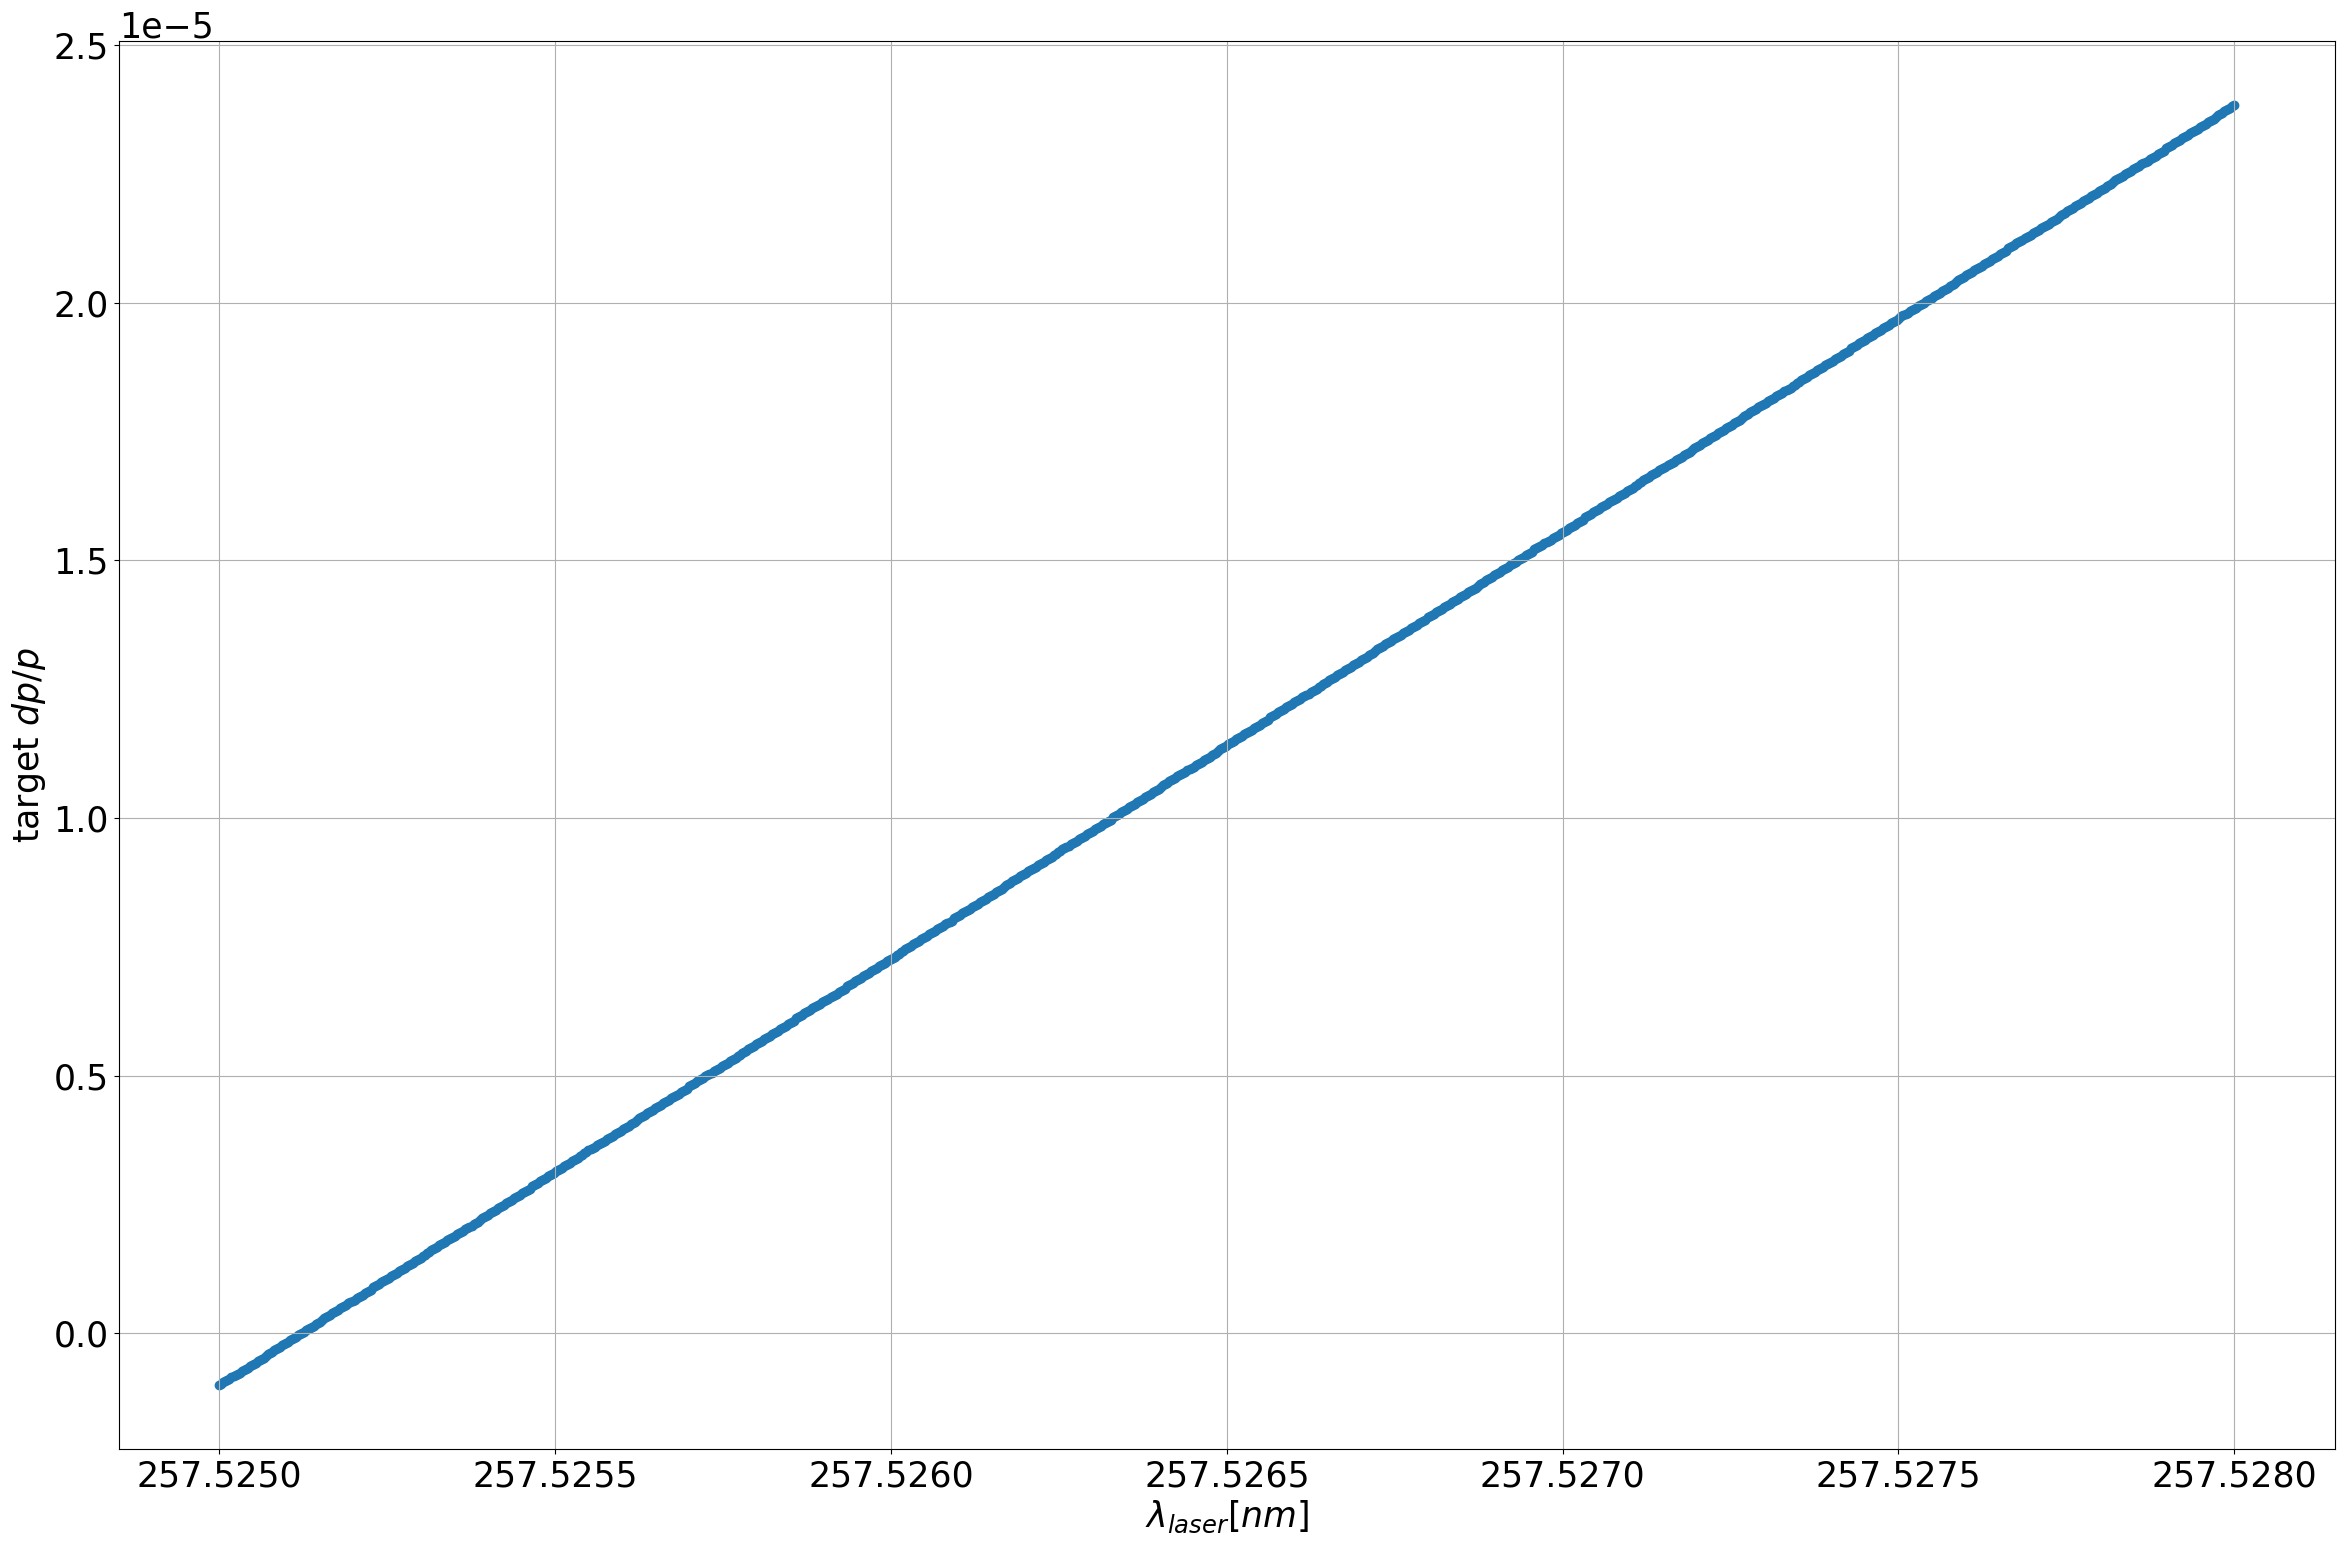

In [97]:
# Create the heatmap
plt.figure(figsize=(12*2, 8*2))
plt.rcParams.update({'font.size': 25})
plt.scatter(laser_range*1e9,corresponding_max_delta_list)
plt.xlabel("$\\lambda_{laser} [nm]$")
plt.ylabel(r"target $dp/p$")
plt.grid(True)
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.show()

In [98]:
# Define the desired value of dp/p
desired_dp_over_p = 5e-6

# Find the index where dp/p is closest to the desired value
closest_index = np.argmin(np.abs(np.array(corresponding_max_delta_list) - desired_dp_over_p))

# Find the corresponding laser wavelength
corresponding_wavelength = laser_range[closest_index]
closest_dp_over_p = corresponding_max_delta_list[closest_index]


corresponding_frequency = C_LIGHT / corresponding_wavelength

print(f"Wavelength Corresponding to dp/p = {desired_dp_over_p}:", corresponding_wavelength)
print(f"Closest dp/p to {desired_dp_over_p}:", closest_dp_over_p)
print(f"Corresponding Frequency: {corresponding_frequency} Hz")

Wavelength Corresponding to dp/p = 5e-06: 2.575257237237237e-07
Closest dp/p to 5e-06: 4.990000498986125e-06
Corresponding Frequency: 1164126261505512.8 Hz
